In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
# Motifying the Y (so it is more suited for Logistical Regression), 
# if the chance is above 0.85 y=1, else y=0

df.loc[df['Chance of Admit '] >= 0.85, 'Chance of Admit '] = 1

df.loc[df['Chance of Admit '] < 0.85, 'Chance of Admit '] = 0


In [4]:
alpha = 0.3
epochs=500
bias = 1

In [5]:

# def Normalize(v):
#     m = np.mean(v)
#     std = np.std(v)
#     return (v-m)/std

In [6]:
X = df.drop('Chance of Admit ', 1).values 
Y = df['Chance of Admit '].values

# Normilazing the data because the valeus are too big for X
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

x_test = X[-50:]
y_test=Y[-50:]

X = X[:len(X) - 50]
Y = Y[:len(Y) - 50]


In [7]:
def Sigmoid(x):
    return 1/ (1+ np.exp(-x))

In [8]:
def Cost_Function(theta):
    m= X.shape[0]
    tmp=np.sum([( Y[i]* np.log( Sigmoid(np.dot(X[i],thetas[1:])+thetas[0])) )+
                ( np.log( 1-Sigmoid(np.dot(X[i],thetas[1:])+thetas[0]))*(1-Y[i]))
                for i in range(m)])
    return -(1/m) * tmp
    

In [9]:
def DerivativeJ(thetas, m, j):
    tmp=0
    if j==0:
        for i in range(0,m):
            tmp+=(Sigmoid(np.dot(X[i],thetas[1:])+thetas[0])-Y[i])
    else:    
        for i in range(0,m):
            tmp+=(Sigmoid(np.dot(X[i],thetas[1:])+thetas[0])-Y[i])*X[i,j-1]
    
    return alpha*(1/(m))*tmp

In [10]:
def Gradient_Decent (thetas):   
    for j in range(len(thetas)):
        
        thetas[j] = thetas[j] - DerivativeJ( thetas, len(X), j)
        
    return thetas

In [11]:
thetas= (np.random.uniform(-1,1,9))

In [18]:
cost=[]

In [19]:
for x in range (epochs):
    thetas = Gradient_Decent(thetas)
    cost.append(Cost_Function(thetas))
    

In [13]:
predict = []
for i in range (100):
    predict.append( Sigmoid(np.dot(X[i],thetas[1:])+thetas[0]) )

In [14]:
real = Y[:100]

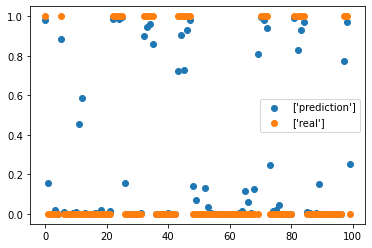

In [15]:
plt.scatter(np.arange(100), predict, label=["prediction"])
plt.scatter(np.arange(100), real, label = ["real"])
plt.legend()

In [16]:
#Accuracy of the model
correct = 0
for i in range(len(x_test)):
    guess = np.round(Sigmoid(np.dot(x_test[i],thetas[1:]) +thetas[0]))
    if y_test[i] == guess:
        correct += 1
print(correct/len(x_test))

0.96


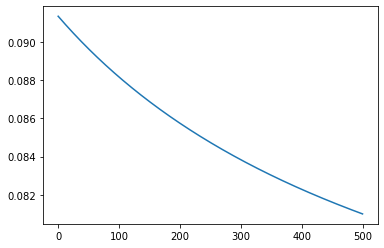

In [20]:
plt.plot(cost)